In [1]:
%load_ext autoreload
import sys
sys.path.append("..")
import imcurio as imc

In [2]:
%autoreload
B = imc.SimBox("../sims/HImesh_0512_z100.fits")
Bf = imc.SimBox("../sims/Sky_0512_z100_060.0-30.0.fits", conversions_from = B)

Box size: 20.33-15.02 deg from z=0.81-1.22


In [3]:
%autoreload
T=imc.TelSim()
vis = T.get_visibilities(B)
visf = T.get_visibilities(Bf)


Beam sigma: 1.99-2.44 deg from z=0.81-1.22
Beam sigma at the edge: 5.12 - 3.08 
Beam sigma: 1.99-2.44 deg from z=0.81-1.22
Beam sigma at the edge: 5.12 - 3.08 


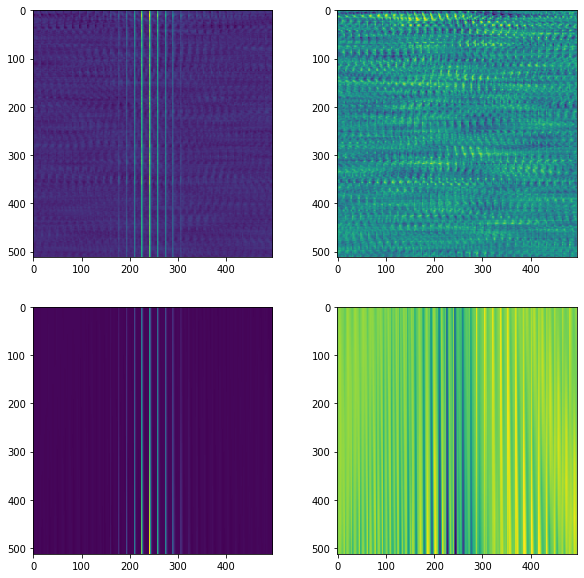

In [4]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1); plt.imshow(np.real(vis))
plt.subplot(2,2,2); plt.imshow(np.imag(vis))
plt.subplot(2,2,3); plt.imshow(np.real(visf))
plt.subplot(2,2,4); plt.imshow(np.imag(visf))


/home/anze/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


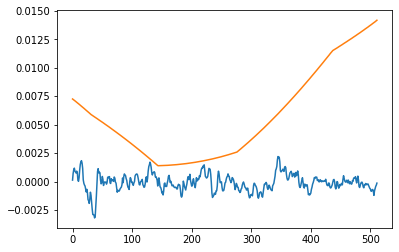

In [5]:
plt.plot(vis[:,400]*100)
plt.plot(visf[:,400])


In [6]:
%autoreload
UV_m=T.u_m[400],T.v_m[400]
print ("Looking at baseline ", UV_m)
visfp2 = T.get_visibilities(Bf, pad = 2, uv_m=UV_m, verbose = True)
visfp4 = T.get_visibilities(Bf, pad = 4, uv_m=UV_m, verbose = True)

Looking at baseline  (10, 0)
Beam sigma: 1.99-2.44 deg from z=0.81-1.22
Beam sigma at the edge: 5.12 - 3.08 
FFT Indices used at slice 0 are (18,0).
FFT Indices used at slice 511 are (11,0).
Beam sigma: 1.99-2.44 deg from z=0.81-1.22
Beam sigma at the edge: 5.12 - 3.08 
FFT Indices used at slice 0 are (37,0).
FFT Indices used at slice 511 are (22,0).


/home/anze/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


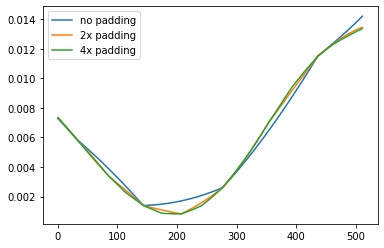

In [7]:
plt.plot(visf[:,400],label='no padding')
plt.plot(visfp2[:,0], label = '2x padding')
plt.plot(visfp4[:,0], label = '4x padding')
plt.legend()